In [2]:

import numpy as np

import scoobpsf
from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import *
import scoobpsf.custom_dm as cdm

from importlib import reload



In [2]:
!nvidia-smi

Fri Sep 22 09:20:03 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe           On | 00000000:25:00.0 Off |                    0 |
| N/A   33C    P0               64W / 300W|   3207MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [35]:
from astropy.io import fits
inf_cube = fits.getdata('inf_cube.fits')
inf_sampling = fits.getheader('inf_cube.fits')['SAMPLING']

# import time
# for i in range(inf_cube.shape[0]):
#     try:
#         imshow1(inf_cube[i])
#         clear_output(wait=True)
#         time.sleep(0.2)
#     except KeyboardInterrupt:
#         break

In [5]:
from pathlib import Path
import os
module_path = Path(os.path.dirname(os.path.abspath(scoobpsf.__file__)))

In [21]:
np.flip

<function numpy.flip(m, axis=None)>

In [30]:
inf_cube = np.flip(fits.getdata(module_path/'pr_ifcube_2022_09_16.fits'), axis=0)
inf_sampling = 8

# import time
# for i in range(inf_cube.shape[0]):
#     try:
#         imshow1(inf_cube[i])
#         clear_output(wait=True)
#         time.sleep(0.2)
#     except KeyboardInterrupt:
#         break

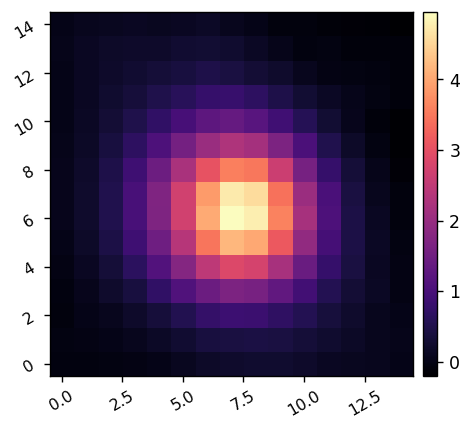

In [31]:
imshow1(inf_cube[200][30:45, 90:105])

In [27]:
reload(cdm)
DM = cdm.DeformableMirror(inf_cube='inf_cube.fits')

In [37]:
reload(cdm)
DM = cdm.DeformableMirror(inf_cube=inf_cube, inf_sampling=inf_sampling)

hit this


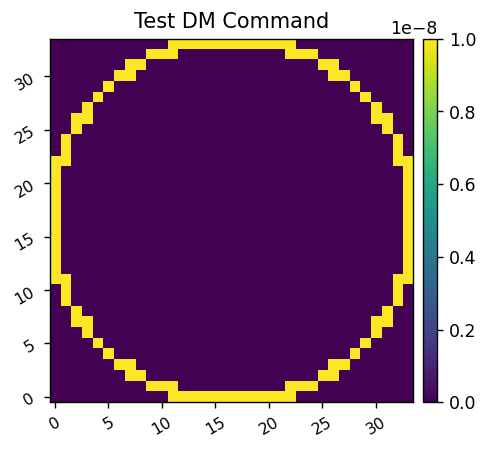

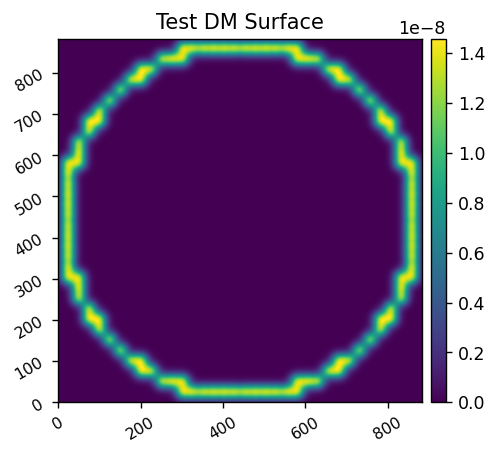

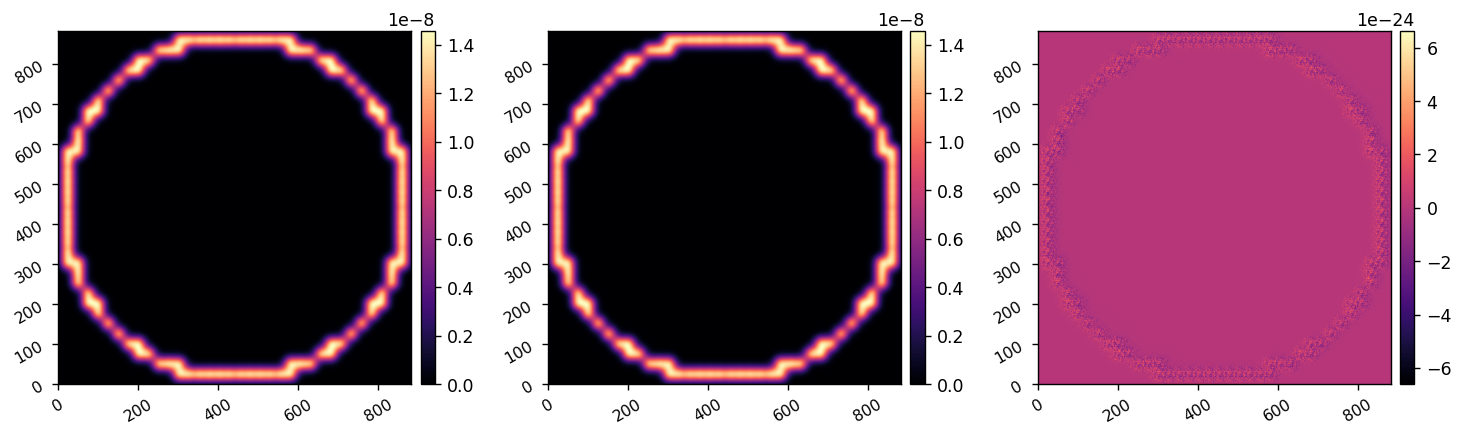

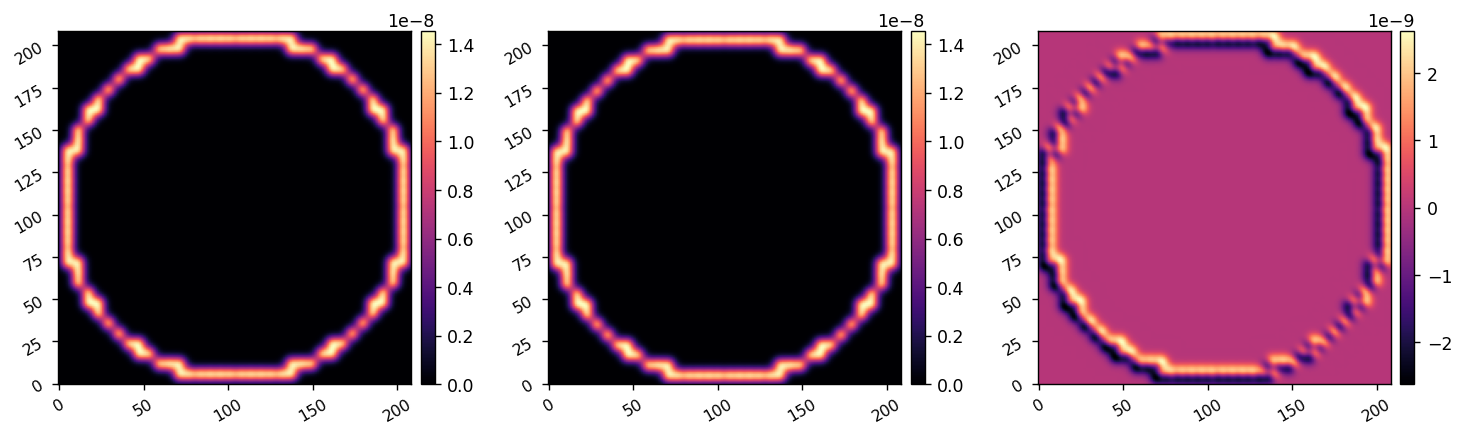

In [38]:
xx = (np.linspace(0, DM.Nact-1, DM.Nact) - DM.Nact/2 + 1/2) * DM.act_spacing.to(u.mm).value*2
x,y = np.meshgrid(xx,xx)
r = np.sqrt(x**2 + y**2)
ring_command = np.asarray((r<10.5)*(r>9.8), dtype=np.float64)
ring_command *= 1e-8
DM.command = xp.array(ring_command)
imshow1(DM.command, 'Test DM Command', cmap='viridis')

test_surf = DM.get_surface()
imshow1(test_surf, 'Test DM Surface', cmap='viridis')

imshow3(test_surf, xp.flipud(xp.fliplr(test_surf)), test_surf-xp.flipud(xp.fliplr(test_surf)) )

test_surf = DM.get_surface(pixelscale=50*u.um/u.pix)
imshow3(test_surf, xp.flipud(xp.fliplr(test_surf)), test_surf-xp.flipud(xp.fliplr(test_surf)) )


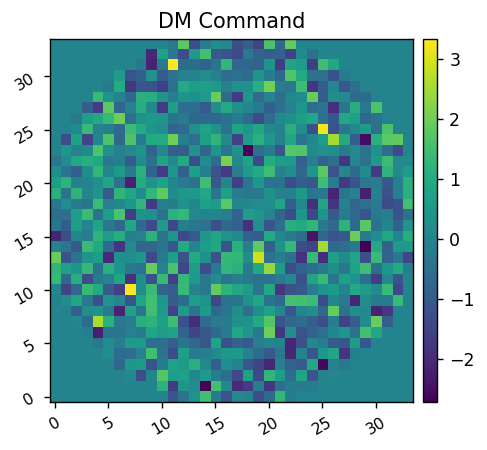

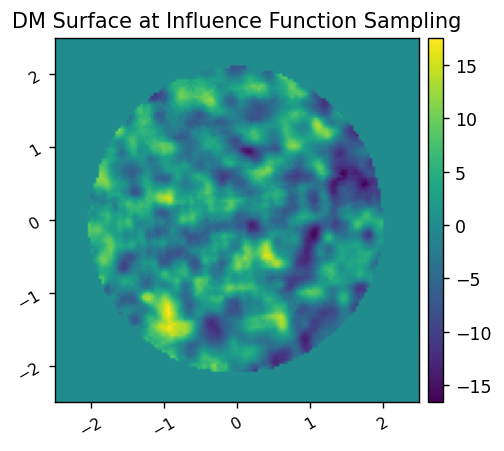

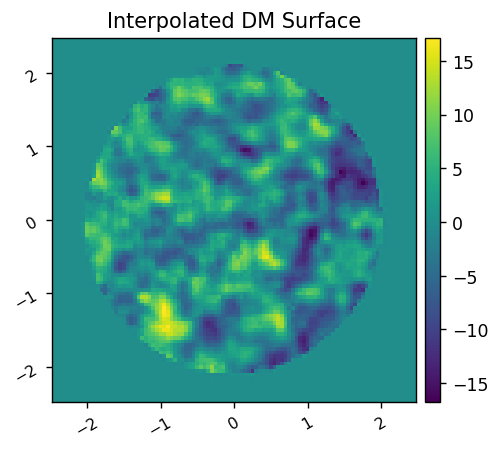

In [34]:
DM.actuators = xp.random.randn(DM.Nacts)
imshow1(DM.command, 'DM Command', cmap='viridis')

surf = DM.get_surface()
imshow1(surf, 'DM Surface at Influence Function Sampling',
        pxscl=DM.inf_pixelscale.to(u.mm/u.pix), cmap='viridis')

surf_pxscl = 50*u.um/u.pix
interpped_surf = DM.get_surface(pixelscale=surf_pxscl)
imshow1(interpped_surf, 'Interpolated DM Surface',
        pxscl=surf_pxscl.to(u.mm/u.pix), cmap='viridis')